In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
from google.colab import auth
import gspread
from google.auth import default

In [6]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [7]:
worksheet = gc.open('DLexp1').sheet1
data = worksheet.get_all_values()
df = pd.DataFrame(data[1:], columns=data[0])
df = df.astype({'Input':'float'})
df = df.astype({'Output':'float'})
df.head()

,Input,Output
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [8]:
X = df[['Input']].values
y = df[['Output']].values
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.]])

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)
X_train1

array([[0.76923077],
       [1.        ],
       [0.96153846],
       [0.42307692],
       [0.61538462],
       [0.        ],
       [0.80769231],
       [0.46153846],
       [0.34615385],
       [0.5       ],
       [0.69230769],
       [0.19230769],
       [0.07692308],
       [0.30769231],
       [0.65384615],
       [0.03846154],
       [0.88461538],
       [0.23076923],
       [0.73076923]])

In [10]:
ai=Sequential([
    Dense(21,activation='relu'),
    Dense(23,activation='relu'),
    Dense(1)
])

In [11]:
ai.compile(optimizer='rmsprop',loss='mse')


In [12]:
ai.fit(X_train1,y_train,epochs=2000)
ai.fit(X_train1,y_train,epochs=2000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 12ms/step - loss: 26936.5527
Epoch 240/2000
1/1 [==============================] - 0s 7ms/step - loss: 26910.9883
Epoch 241/2000
1/1 [==============================] - 0s 11ms/step - loss: 26885.2969
Epoch 242/2000
1/1 [==============================] - 0s 8ms/step - loss: 26859.4805
Epoch 243/2000
1/1 [==============================] - 0s 10ms/step - loss: 26833.5332
Epoch 244/2000
1/1 [==============================] - 0s 8ms/step - loss: 26807.4570
Epoch 245/2000
1/1 [==============================] - 0s 16ms/step - loss: 26781.2559
Epoch 246/2000
1/1 [==============================] - 0s 7ms/step - loss: 26754.9258
Epoch 247/2000
1/1 [==============================] - 0s 7ms/step - loss: 26728.4668
Epoch 248/2000
1/1 [==============================] - 0s 13ms/step - loss: 26701.8809
Epoch 249/2000
1/1 [==============================] - 0s 8ms/step - loss: 26675.1641
Epoch 250/2000
1/1 [====

<Axes: >

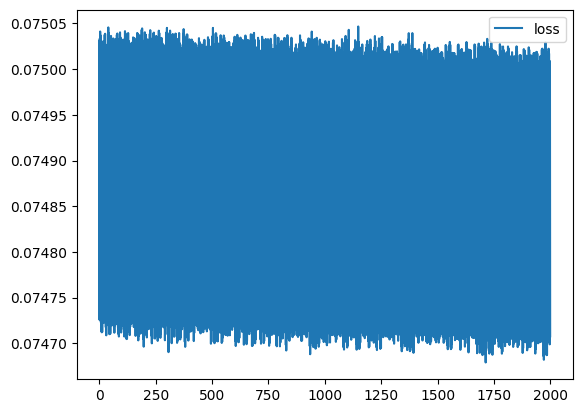

In [13]:
loss_df = pd.DataFrame(ai.history.history)
loss_df.plot()

In [14]:
X_test1 = Scaler.transform(X_test)
ai.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 125ms/step - loss: 0.2619


0.2618960440158844

In [15]:
X_n1 = [[30]]
X_n1_1 = Scaler.transform(X_n1)
ai.predict(X_n1_1)

1/1 [==============================] - 0s 100ms/step


array([[300.5685]], dtype=float32)